In [ ]:
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

from decimal import Decimal #==> trae digitos de presicion infinita. con cuidado. Decimal es un tipo de datos

In [ ]:
eps=sys.float_info.epsilon
print(eps)
print(1)
print(1e-15<eps)

2.220446049250313e-16
1
False


Ejercicio 1. Algunos experimentos: Realizar las siguientes operaciones en python. Comparar el resultado esperado con el obtenido. (Notamos ε al ´epsilon de la m´aquina. Puede
obtenerse con los modulos, m´etodos y atributos dados por: sys.float_info.epsilon o
numpy.finfo(‘float’).eps).


(a)

In [ ]:
p = 10e34
q = 1
print((p+q)-p)

0.0


(b)

In [ ]:
p = 100
q = 100e-15
print((p+q)+q)
print(((p+q)+q)+q)
#Comparando
print(p+2*q)
print(p+3*q)

100.0000000000002
100.0000000000003
100.0000000000002
100.0000000000003


(c) y (d)

In [ ]:
print(0.1+0.2==0.3)
print(0.1+0.3==0.4)

False
True


Estimar el valor de f(x) = (1-cos(x))/x^2 para x cercano a 0. Graficar f en el intervalo Ι=[-4e - 8, 4e - 8]





1/2
2.220446049250313e-16


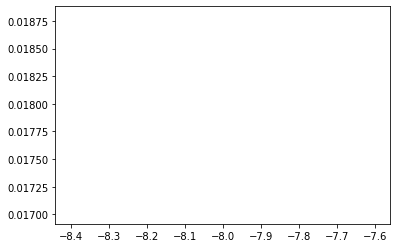

In [ ]:
import numpy as np
def f(x):
  return(1 - np.cos(x))/(x**2)

x = Symbol('x')
y = (1-cos(x))/(x**2)
print(limit(y,x,0))

dom = np.arange((-4)*(2.220446049250313e-16)-8,4*(2.220446049250313e-16)-8, 2.220446049250313e-16)
plt.plot(dom,f(dom))
print(2.220446049250313e-16)

(f) (g) (h) (i) y (j)

In [ ]:
print(eps/2)
print((1+(eps/2))+ eps/2)
print(1 + (eps/2 + eps/2))
print(((1+(eps/2))+eps/2)-1)
print( (1+ (eps/2 + eps/2) )-1)

1.1102230246251565e-16
1.0
1.0000000000000002
0.0
2.220446049250313e-16


(k) y (i)

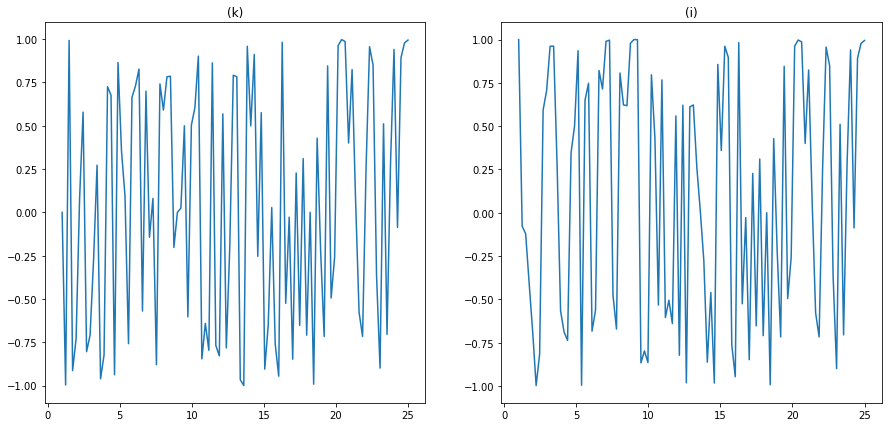

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1, 25, 100)
plt.subplot(1, 2, 1)
plt.title("(k)")
plt.plot(x, np.sin((10**x)*np.pi))

plt.subplot(1, 2, 2)
plt.plot(x, np.sin(np.pi/2 + np.pi*10**x))
plt.title("(i)")

fig = plt.gcf()
fig.set_size_inches(15, 7)

plt.show()

**Ej 5** Hallar la raíz menor en módulo de la ecuación $x^2 - 40x + 0.25 = 0$
utilizando aritmética de 4 dígitos y comparar con el resultado obtenido utilizando aritmética exacta.

Calcular el **error relativo**. 


Preguntas:

*Cómo calcular con mayor precisión dicha raíz y el error relativo del nuevo método*

***Resolución***: 

$m = 4 \\ f (x) = x^2 -40x + 0.25 \\ \small\text{Error Relativo} = \frac{|f(f(x) + f(y)) - |x-y||}{|x-y|} \leq 2ɛ + ɛ^2 $ \\


epsilon ($ɛ$) es el de máquina, recuerdo que ɛ es el mínimo tal que ɛ + 1 = 1

------

En líneas generales, usando la resolvente:

$a = 1 \\ b = -40 \\ c = 0.25$


$\frac{-b ± \sqrt{b^2-4ac}}{2a}$

$\frac{40 + \sqrt{1600-1}}{2} = x_+$  

$\frac{40 - \sqrt{1600-1}}{2} = x_- \\ x_+ ≃ 39.99374 \\ x_- ≃ 0.006251 $

-----
Por el ej4, vemos que se parece a $α - \sqrt{α^2 -x}, x<<α $ (en este casi 1/40 = 0.25/10 = 0.025 son dos órdenes de magnitud más chico, la mitad de la mantiza (4), al calcular $ {40\over2} \pm \frac{\sqrt{1600-1}}{2}$ se van a parecer mucho.

----

Calculando:

$float(40/2) = float(float(40)/float(2)) \\float ((-40)^2 = float(float(-40)float(-40))\\ float(4*0.25*1) = float(float(4)*float(0.25)float(1) \\ float((-40)^2 - 4*1*0.25)= float(float(float(-40)float(-40))- float(float(4)*float(0.25)*float(1)))$





En el último paso se produce una pérdida significativa.

Tengo un número de $1600 = 0.1600*10^4$ restabdo a un número $1 = 0.1*10^1$ si reescribimos para que los números tengan la misma potencia queda: $1600 = 0.1600*10^4$ y $0.1*10^0 = 0.0001*10^4$, restandp queda $0.1599*10^4$ como estamos trabajando con una **mantisa de 4 dígitos** se guarda m = 1599, entonces $(-40)^2 - 1 = 0.1599*10^4$

Ahota aplicamos raíz cuadrada, $\sqrt{0.1599*10^4} = 0.3998*10^2$, esto lo restamos a $40 = 0.4000*10^2$ y da $0.002*10^2 = 0.2*10^{-1}$ y si lo sumamos $0.7998*10^2$, diviendo por (*inentendible*). Vemos que la resta, el resultado perdió 3 dígitos en significancia cuande de manera exacta da 0.006250.


Este error se produce por la **resta** de dos números **muy parecidos**-

El método propuesto:

$float(40/2) = 40(1 + δ_1)(1/2)(1+\delta_2)(1+\delta_3)\\ float((-40)^2) = 40(1+\delta_1)40(1+\delta_1)(1+\delta_4) = 40^2(1 + 2\delta_1 + \delta_1^2)(1+\delta_4) = 40^2(1 + 2\delta_1 + \delta_1^2 + \delta4 + 2\delta_1\delta_4 + \delta_1^2\delta_4)\\ float(4*0.25*1) = 4(1+\delta_5)1(1+\delta_6)*(1/4)(1+\delta_7)(1+\delta_8) = (1+\delta_5+\delta_6+\delta_7+\delta_8) + O(\delta^2)\\ float((-40)^2 - 4*1*0.25) = (40^2((1+2\delta_1 + \delta_4 + \delta_1^2 +2\delta_1\delta_4 + \delta_1^2\delta_4) - (1 + \delta_5 + \delta_6 + \delta_7 + \delta_8 + O(\delta^2)))(1+\delta_9) = (40^2-1)(1+2\delta_1 +\delta_4 + \delta_5 + \delta_6 + \delta_7 + \delta_8 + \delta_9 + O(\delta^2)) $ 


de acá vemos que la raíz tiene un error relativo de 9ɛ y cuando aplique la raíz estos aumentaran.


Los pasos serían:

(1) Multiplicar y dividir por el conjugado cuando la resolvente es restando

(1bis) Como el discriminante en nuestro caso es positivo, ignoro el módulo. 

(2) Calculando: $\frac{0.001*10^2}{2*0.7998*10^2}$

Queda $0.006251 = 0.6251*10^{-2}$


en este nuevo método, el error de la resta es $\frac{|0.006250… - 0.006251|}{|0.006250\dots|} = 0.370*10^{-5}$ y antes era $\small{ErrorRelativo} = \normalsize0.599\dots$


**Ejercicio 7**. Escribir un programa que reciba como input o bien una función $f : \mathbb{N}_0 → \mathbb{R}$ y
un número $\mathbb{N}$, o bien un vector $f$ (de longitud $N$) y calcule, término a término, la suma:

$\qquad\qquad\qquad∑\limits_{k=0}^{N}f(k)$


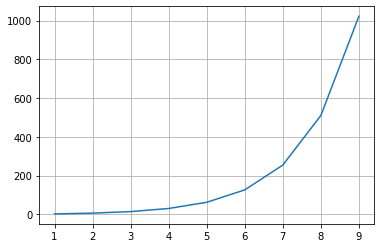

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x : 2**x #la funcion f(x):N->R

def sum_f(N):
  global f
  suma = [] #Contenedor de la sumatoria 
  suc = [] #Contenedor de la sucesion f(x_i)
  for i in range(1, N):
    suc.append(f(i))
    suma.append(sum(suc))
  return suma

plt.plot(range(1,10), sum_f(10))
plt.grid()



G_N=9999.999994998947


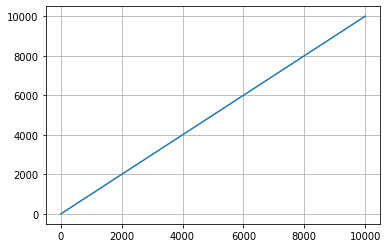

In [ ]:
f = lambda x : (1-10e-14)**x #ingreso la función f:N->R

def sum_f(N):
  global f
  suma = []
  suc = []
  for i in range(0, N):
    suc.append(f(i))
    suma.append(sum(suc))
  return suma

plt.plot(range(0, 10000), sum_f(10000))
plt.grid()

print(f"G_N={sum_f(10000)[-1]}")


**Ejercicio 8**. Formula para la suma de una serie geométrica:

$ G_N = \sum\limits_{k=0}^{N}r^k =\frac{(1-r^{N+1})}{1-r} = Q_N$ donde $r<1$

Tomar un $r$ proximo a 1 (por ej, $r=1-10^{-14}$) y un $N$ grande. Calcular el valor de $G_N$ con el programa del ejercicio anterior. Comparar con el valor de $Q_N$.



Q_N=10000.0


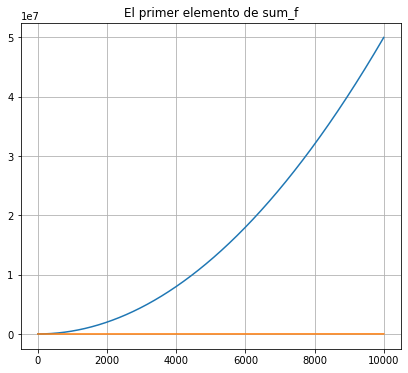

In [ ]:
f = lambda x : (1 - (1- 10e-14)**(x+1))/(1-(1-10e-14)) #la geométrica

def sum_f(N):
  suma = []
  suc = []
  for i in range(0, N):
    suc.append(f(i))
    suma.append(sum(suc))
  return suma, suc

plt.figure(figsize = (15, 6))
plt.subplot(1,2,1)
plt.plot(range(0, 10000), sum_f(10000)[0])
plt.plot(range(0, 10000), sum_f(10000)[1])
plt.grid()
print(f"Q_N={sum_f(10000)[1][-1]}")
plt.show()


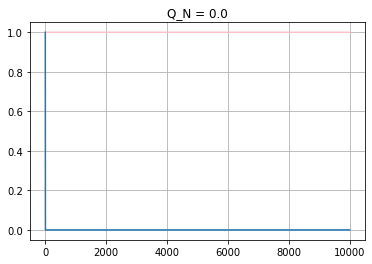

In [ ]:
f = lambda x : (10e-14)**(x)

def sum_f(N):
  global f
  suma = []
  suc = []
  for i in range(0, N):
    suc.append(f(i))
    suma.append(sum(suc))
  return suma, suc

plt.title(f"Q_N = {sum_f(10000)[1][-1]}")
plt.plot(range(0, 10000), sum_f(10000)[0], color = 'pink')
plt.plot(range(0, 10000), sum_f(10000)[1])
plt.grid()


**Ejercicio 9**. El desarrollo de Taylor de la función $e^x$ proporciona una forma muy inestable de calcular este valor cuando $x$ es negativo. Utilizar el programa del Ejercicio 7 para evaluar el desarrollo de Taylor hasta grado $n$ de la función $e^x$ en $x=-12$, para $n=1,\dots,100$. Comparar con el valor exacto: $\small0.000006144212353328210\dots$. Proponer un método alternativo para estimar $e^{-12}$. Verificar si la aproximación obtenida es mejor.

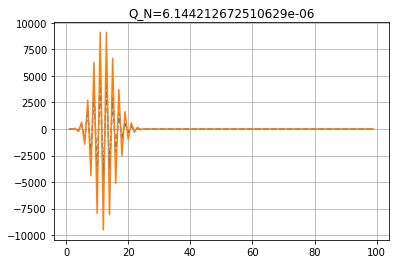

In [ ]:
import math
def f(n):
  suc = []
  for i in range(n):
    suc.append(((-12))**i/math.factorial(i))
  return sum(suc)

def sum_f(N):
  global f
  suma = []
  suc = []
  for i in range(1, N):
    suc.append(f(i))
    suma.append(sum(suc))
  return suma, suc

plt.title(f"Q_N={sum_f(100)[1][-1]}")
plt.plot(range(1, 100), sum_f(100)[0], "--")
plt.plot(range(1, 100), sum_f(100)[1])
plt.grid()
plt.show()
    
